https://huggingface.co/learn/deep-rl-course/en/unit3/deep-q-algorithm
https://www.kaggle.com/code/getanmolgupta01/unsw-nb15-cybersecurity-threat-detection-ann

In [1]:
import os

In [2]:
import pandas as pd

Utilize data from UNSW_NB15 dataset for IDS configuration

In [3]:
# pip install gym torch numpy matplotlib

In [4]:
!pip install gymnasium

In [5]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu126

Looking in indexes: https://download.pytorch.org/whl/cu126


In [6]:
honeyiq_source = "/home/caesar/HoneyIQ/datasets/unsw-nb15/filtered/"

In [7]:
honeyiq_datasource_files_unsw_nb15 = os.listdir(honeyiq_source)
honeyiq_datasource_files_unsw_nb15

['y_train', 'y_test', 'X_train_scaled', 'X_test_scaled']

In [8]:
x_train_scaled = pd.read_csv(honeyiq_source + "X_train_scaled")
x_train_scaled.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0,-0.987916,0.548646,0.817149,-0.171897,-0.536854,-1.756071,-1.639645,-1.282971,-1.479522,-0.538451,-1.250066,-0.068155,0.011133,0.004051,0.028399,-0.652144,0.931951,-0.708886,0.000764
1,1,-0.936429,0.548646,0.817149,0.800497,-0.620703,-0.395026,-0.311173,-1.282971,-1.479522,-0.538451,0.415706,-1.122239,0.011327,0.004051,0.027258,-0.772902,0.931951,-0.708886,0.000764
2,2,0.877186,-0.857835,-1.223767,-0.578442,-0.511854,1.096553,-0.311173,0.834084,1.232218,1.402248,0.851905,0.985928,0.008438,0.004307,-0.118794,0.733201,-0.952750,0.788790,0.000026
3,3,0.877186,-1.992032,-1.223767,0.187323,-0.089087,-0.897349,-1.639645,-1.282971,-1.479522,-0.538451,-1.250066,-1.122239,0.008840,0.004307,-0.118794,0.455689,-1.155147,0.736169,-2.359205
4,4,-1.007569,0.548646,0.817149,0.800497,-0.624425,-0.395026,-0.311173,0.394755,0.452358,2.537488,0.415706,-1.122239,0.011337,0.004051,0.028986,-0.772902,0.931951,-0.708886,0.000764


In [9]:
x_test_scaled = pd.read_csv(honeyiq_source + "X_test_scaled")
x_test_scaled.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0,-0.549988,0.548646,0.817149,1.658325,-1.191235,0.237826,0.306534,2.378939,1.862088,-0.538451,-0.199082,0.985928,0.014270,0.004051,0.022769,-0.752844,0.931951,-0.708886,0.000764
1,1,-1.007569,0.548646,0.817149,0.800497,-0.620022,-0.395026,-0.311173,0.394755,0.051456,2.537488,0.415706,-1.122239,0.011326,0.004051,0.028986,-0.772902,0.931951,-0.708886,0.000764
2,2,-0.987916,0.548646,0.817149,0.800497,-0.238053,0.463700,0.527003,0.394755,1.418302,2.537488,1.466694,-1.122239,0.010677,0.004051,0.028399,-0.772902,0.931951,-0.708886,0.000764
3,3,0.878719,0.902151,-1.223767,-0.676540,-0.176870,-0.038623,0.527003,-0.224445,1.017399,-0.538451,-0.199082,0.985928,0.010616,0.003836,0.234080,2.019390,-0.676580,1.203668,1.117083
4,4,-0.969620,0.548646,0.817149,1.658325,-0.128613,0.237826,0.306534,0.394755,0.452358,-0.538451,-0.199082,0.985928,0.010573,0.004051,0.027944,-0.752844,0.931951,-0.708886,0.000764


In [10]:
y_train = pd.read_csv(honeyiq_source + "y_train")
y_train.head()

,Unnamed: 0,threat_level
0,2086680,3
1,2143391,2
2,2068515,0
3,1283975,2
4,2152019,2


In [11]:
y_test = pd.read_csv(honeyiq_source + "y_test")
y_test.head()

,Unnamed: 0,threat_level
0,2420281,0
1,2141939,2
2,1625901,2
3,1529186,0
4,1371697,0


In [12]:
x_train_scaled.drop(columns=['Unnamed: 0'], inplace=True)
x_test_scaled.drop(columns=['Unnamed: 0'], inplace=True)

In [13]:
# Create the custom environment for the model
import gymnasium as gym
from gymnasium import spaces

In [14]:
import seaborn as sns
import matplotlib

In [15]:
import numpy as np

<p> <b> Define threat levels based on attack levels </b> </p>

In [16]:
import random
import torch
import torch.nn as nn
import torch.optim as optim

In [17]:
from collections import deque

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

class NetworkThreatEnv(gym.Env):
    def __init__(self, X, y):
        super(NetworkThreatEnv, self).__init__()
        self.X = X  # Features (Pandas DataFrame)
        self.y = y  # Labels (Pandas Series or NumPy array)
        self.current_step = 0
        
        # Define action and observation space
        self.action_space = spaces.Discrete(4)  # 4 threat levels
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(X.shape[1],), dtype=np.float32)
    
    def reset(self):
        self.current_step = 0
        state = self.X.iloc[self.current_step].values  # Access the first row and convert to NumPy array
        return state.astype(np.float32)  # Ensure the state is of type float32
    
    def step(self, action):
        # Check if the episode has ended
        if self.current_step >= len(self.X):
            raise IndexError("Episode has already ended. Call reset() to start a new episode.")

        # print(action)
        # print(self.y.iloc[self.current_step])
        # print(self.current_step)
        # Calculate reward
        if isinstance(self.y, pd.Series):
            reward = 1 if action == self.y.iloc[self.current_step] else -1
        elif isinstance(self.y, np.ndarray):
            reward = 1 if action == self.y[self.current_step] else -1
        else:
            raise ValueError("self.y must be a Pandas Series or NumPy array.")
        
        # Move to the next step
        self.current_step += 1
        
        # Check if the episode has ended
        done = self.current_step >= len(self.X)
        
        # Return the next state
        next_state = np.zeros_like(self.X.iloc[0].values).astype(np.float32) if done else self.X.iloc[self.current_step].values.astype(np.float32)
        return next_state, reward, done, {}

In [21]:
class DQN(nn.Module):
    def __init__(self, state_size, action_size):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(state_size, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, action_size)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)  # Replay memory
        self.gamma = 0.95  # Discount factor
        self.epsilon = 1.0  # Exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.model = DQN(state_size, action_size)
        self.optimizer = optim.Adam(self.model.parameters(), lr=self.learning_rate)
        self.criterion = nn.MSELoss()
    
    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))
    
    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)  # Explore
        state = torch.FloatTensor(state)
        with torch.no_grad():
            q_values = self.model(state)
        return torch.argmax(q_values).item()  # Exploit
    
    def replay(self, batch_size):
        if len(self.memory) < batch_size:
            return
        minibatch = random.sample(self.memory, batch_size)
        
        # Convert states and next_states to NumPy arrays of type float32
        states = np.array([t[0] for t in minibatch], dtype=np.float32)
        actions = np.array([t[1] for t in minibatch])
        rewards = np.array([t[2] for t in minibatch], dtype=np.float32)
        next_states = np.array([t[3] for t in minibatch], dtype=np.float32)
        dones = np.array([t[4] for t in minibatch], dtype=np.float32)

        # Convert to PyTorch tensors
        states = torch.FloatTensor(states)
        actions = torch.LongTensor(actions)
        rewards = torch.FloatTensor(rewards)
        next_states = torch.FloatTensor(next_states)
        dones = torch.FloatTensor(dones)

        # Compute Q-values for current states
        current_q_values = self.model(states).gather(1, actions.unsqueeze(1))

        # Compute Q-values for next states
        next_q_values = self.model(next_states).max(1)[0].detach()
        target_q_values = rewards + (1 - dones) * self.gamma * next_q_values

        # Compute loss and update the model
        loss = self.criterion(current_q_values.squeeze(), target_q_values)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        # Decay epsilon
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

In [22]:
!pip3 install stable_baselines3

In [23]:
y_train.head()

,Unnamed: 0,threat_level
0,2086680,3
1,2143391,2
2,2068515,0
3,1283975,2
4,2152019,2


In [24]:
x_train_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-0.987916,0.548646,0.817149,-0.171897,-0.536854,-1.756071,-1.639645,-1.282971,-1.479522,-0.538451,-1.250066,-0.068155,0.011133,0.004051,0.028399,-0.652144,0.931951,-0.708886,0.000764
1,-0.936429,0.548646,0.817149,0.800497,-0.620703,-0.395026,-0.311173,-1.282971,-1.479522,-0.538451,0.415706,-1.122239,0.011327,0.004051,0.027258,-0.772902,0.931951,-0.708886,0.000764
2,0.877186,-0.857835,-1.223767,-0.578442,-0.511854,1.096553,-0.311173,0.834084,1.232218,1.402248,0.851905,0.985928,0.008438,0.004307,-0.118794,0.733201,-0.952750,0.788790,0.000026
3,0.877186,-1.992032,-1.223767,0.187323,-0.089087,-0.897349,-1.639645,-1.282971,-1.479522,-0.538451,-1.250066,-1.122239,0.008840,0.004307,-0.118794,0.455689,-1.155147,0.736169,-2.359205
4,-1.007569,0.548646,0.817149,0.800497,-0.624425,-0.395026,-0.311173,0.394755,0.452358,2.537488,0.415706,-1.122239,0.011337,0.004051,0.028986,-0.772902,0.931951,-0.708886,0.000764


In [25]:
# from stable_baselines3 import DQN
# from stable_baselines3.common.env_util import make_vec_env

# # Create vectorized environment
# env = make_vec_env(NetworkThreatEnv, n_envs=1)

# # Define and train DQN agent
# model = DQN("MlpPolicy", env, verbose=1)
# model.learn(total_timesteps=10000)

# # Save the model
# model.save("unsw_nb15_dqn")

# env = NetworkThreatEnv(x_train_scaled, y_train)
# state = env.reset()  # Should return the first row of X_train as a NumPy array
# print(state)


In [26]:
y_train.drop(columns=['Unnamed: 0'], inplace=True)

In [27]:
y_test.drop(columns=['Unnamed: 0'], inplace=True)

In [28]:
type(x_train_scaled)


pandas.core.frame.DataFrame

In [29]:
type(y_train.iloc[:,0] )

pandas.core.series.Series

## Training DQN Agent

In [30]:
# Initialize environment and agent
env = NetworkThreatEnv(x_train_scaled, y_train.iloc[:,0] )
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
agent = DQNAgent(state_size, action_size)

# Training parameters
batch_size = 32
num_episodes = 1000

# Training loop
for episode in range(num_episodes):
    state = env.reset()
    total_reward = 0
    done = False

    while not done:
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        agent.remember(state, action, reward, next_state, done)
        state = next_state
        total_reward += reward

    if len(agent.memory) > batch_size:
        agent.replay(batch_size)

    if (episode + 1) % 100 == 0:
        print(f"Episode: {episode + 1}, Total Reward: {total_reward}, Epsilon: {agent.epsilon:.2f}")

Episode: 100, Total Reward: -5880, Epsilon: 0.61
Episode: 200, Total Reward: 7500, Epsilon: 0.37
Episode: 300, Total Reward: 15496, Epsilon: 0.22
Episode: 400, Total Reward: 21858, Epsilon: 0.13
Episode: 500, Total Reward: 24216, Epsilon: 0.08
Episode: 600, Total Reward: 27918, Epsilon: 0.05
Episode: 700, Total Reward: 27616, Epsilon: 0.03
Episode: 800, Total Reward: 28992, Epsilon: 0.02
Episode: 900, Total Reward: 31704, Epsilon: 0.01
Episode: 1000, Total Reward: 32410, Epsilon: 0.01


## Evaluate DQN Agent

In [48]:
# Create a test environment
test_env = NetworkThreatEnv(x_test_scaled, y_test.iloc[:,0])

# Evaluate the agent
correct_predictions = 0
total_predictions = len(x_test_scaled)

state = test_env.reset()
state = np.reshape(state, [1, state_size])
done = False

while not done:
    action = agent.act(state)
    next_state, reward, done, _ = test_env.step(action)
    next_state = np.reshape(next_state, [1, state_size])
    state = next_state

    if reward == 1:
        correct_predictions += 1

# Calculate accuracy
accuracy = correct_predictions / total_predictions
print(f"Test Accuracy: {accuracy * 100:.2f}%")

IndexingError: Too many indexers

In [39]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def evaluate_agent(env, agent):
    """
    Evaluate the DQN agent and compute metrics.
    
    Returns:
        dict: Dictionary containing accuracy, precision, recall, and F1-score.
    """
    all_preds = []
    all_true = []
    
    state = env.reset()
    done = False
    
    while not done:
        action = agent.act(state)  # Model's prediction
        next_state, reward, done, _ = env.step(action)
        
        # Store prediction and true label
        all_preds.append(action)
        all_true.append(env.y[env.current_step - 1])  # Previous step's true label
        
        state = next_state
    
    # Calculate metrics
    metrics = {
        'accuracy': accuracy_score(all_true, all_preds),
        'precision': precision_score(all_true, all_preds, average='weighted'),
        'recall': recall_score(all_true, all_preds, average='weighted'),
        'f1': f1_score(all_true, all_preds, average='weighted')
    }
    
    cm = confusion_matrix(all_true, all_preds)
    
    return metrics, cm


In [45]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, class_names=None):
    """
    Plot a confusion matrix using seaborn.
    
    Args:
        cm (np.array): Confusion matrix from sklearn.
        class_names (list): Names of classes (e.g., threat levels).
    """
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, 
                yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

In [36]:
# Evaluate
metrics = evaluate_agent(test_env, agent)

# Print results
print(f"Accuracy: {metrics['accuracy']:.4f}")
print(f"Precision: {metrics['precision']:.4f}")
print(f"Recall: {metrics['recall']:.4f}")
print(f"F1-Score: {metrics['f1']:.4f}")

Accuracy: 0.8408
Precision: 0.8471
Recall: 0.8408
F1-Score: 0.8419


Evaluation Metrics:
Accuracy: 0.8391
Precision: 0.8449
Recall: 0.8391
F1: 0.8401


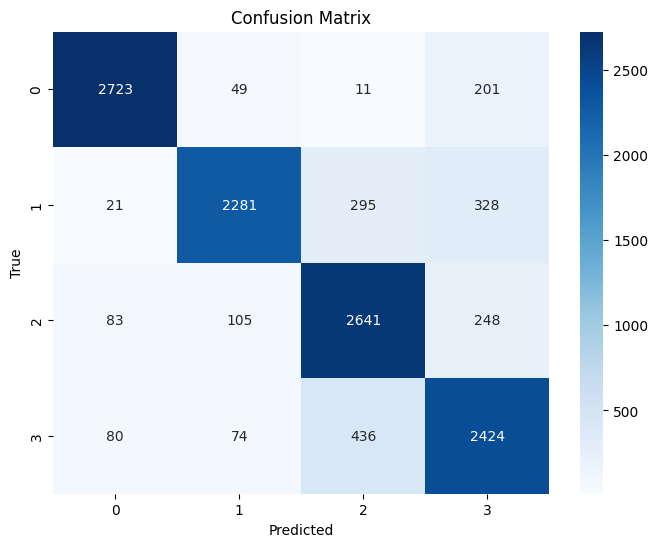

In [47]:
# Initialize test environment
test_env = NetworkThreatEnv(x_test_scaled, y_test.values)  # Ensure y_test is a NumPy array

# Evaluate and get metrics + confusion matrix
metrics, cm = evaluate_agent(test_env, agent)

# Print metrics
print("Evaluation Metrics:")
for name, value in metrics.items():
    print(f"{name.capitalize()}: {value:.4f}")

# Plot confusion matrix
class_names = ['0', '1', '2', '3']  # Replace with your actual class names
plot_confusion_matrix(cm, class_names)